In [4]:
%matplotlib inline
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from numpy import concatenate
from keras.utils import to_categorical
from math import sqrt

In [177]:
df = pd.read_csv('/Users/renaudleurquin/Documents/TSP/2A/Cassiopé/BDD/FDAX_indicateurs.txt', sep='\t', skipinitialspace=True)
#skipinitialspace permet de retirer les espaces génants sur les colonnes et sur les données

#suppression des colonnes non utiles à la prédiction
colonnes = ['OHLC Avg', 'HLC Avg', 'HL Avg', 'Open.1','High.1', 'Low.1', "etat variable 'Volume'", 'Close',"etat variable 'DeltaSpread'", "etat variable 'PriceChange'","etat variable 'Delta'", 'volume', 'deltaSpread', 'priceChange','delta', "etat variable 'spread'", "etat variable 'open'","etat variable 'close'", "etat variable 'deltaOpen'","etat variable 'deltaClose'", 'weak', 'strong', 'Strong Triangle','weak Triangle', 'delta_sos', 'delta_sow', "Signal d'achat",'Signal de vente', 'trendFilter']
df.drop(colonnes, axis = 1, inplace = True)

#df['Date&Time'] = df['Date'] +' '+ df['Time']
#df['date_time'] = pd.to_datetime(df['Date&Time'], format='%d/%m/%Y %H:%M:%S.%f')
#df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f')
df = df[['Date', 'Time', 'Open', 'High', 'Low', 'Last', 'Volume', 'Bid Volume', 'Ask Volume','# of Trades']]
df.head(10)

,Date,Time,Open,High,Low,Last,Volume,Bid Volume,Ask Volume,# of Trades
0,04/01/2013,08:00:00.0,7842.0,7844.5,7839.5,7840.5,484,78,68,89
1,04/01/2013,08:05:00.0,7840.0,7842.0,7837.0,7838.0,463,299,164,214
2,04/01/2013,08:10:00.0,7837.5,7837.5,7833.0,7836.5,477,297,180,177
3,04/01/2013,08:15:00.0,7836.5,7840.0,7835.5,7839.5,191,74,117,80
4,04/01/2013,08:20:00.0,7840.0,7840.0,7837.0,7837.0,81,68,13,49
5,04/01/2013,08:25:00.0,7837.0,7842.5,7836.5,7840.5,164,57,107,87
6,04/01/2013,08:30:00.0,7840.5,7841.5,7839.0,7840.0,112,68,44,43
7,04/01/2013,08:35:00.0,7840.0,7841.0,7839.0,7840.0,117,56,61,64
8,04/01/2013,08:40:00.0,7840.0,7841.0,7838.0,7840.0,119,72,47,55
9,04/01/2013,08:45:00.0,7840.0,7842.5,7839.0,7842.5,92,20,72,49


In [6]:
df['volume_moy_mobile'] = df['Volume'].rolling(23).mean()
df['volume_std_mobile'] = df['Volume'].rolling(23).std(ddof=0)
df['zscore_volume'] = (df['Volume']-df['volume_moy_mobile'])/(df['volume_std_mobile'])
df.drop(['volume_moy_mobile', 'volume_std_mobile'], axis=1, inplace=True)
df = df.iloc[22:,:]

In [7]:
df.tail(30)

,date_time,Time,Open,High,Low,Last,Volume,zscore_volume
296577,2019-12-11 19:35:00,1900-01-01 19:35:00,13158.0,13158.0,13152.0,13152.5,71,-0.689854
296578,2019-12-11 19:40:00,1900-01-01 19:40:00,13153.0,13154.0,13151.0,13152.5,83,-0.567228
296579,2019-12-11 19:45:00,1900-01-01 19:45:00,13152.0,13153.0,13151.5,13153.0,52,-0.709857
296580,2019-12-11 19:50:00,1900-01-01 19:50:00,13153.0,13153.5,13151.0,13151.5,132,-0.080209
296581,2019-12-11 19:55:00,1900-01-01 19:55:00,13151.5,13166.5,13150.0,13158.5,229,1.010928
296582,2019-12-11 20:00:00,1900-01-01 20:00:00,13158.0,13160.5,13153.0,13158.5,266,1.391154
296583,2019-12-11 20:05:00,1900-01-01 20:05:00,13159.5,13164.0,13159.0,13162.0,221,1.513340
296584,2019-12-11 20:10:00,1900-01-01 20:10:00,13162.5,13163.0,13155.0,13155.5,178,0.937554
296585,2019-12-11 20:15:00,1900-01-01 20:15:00,13155.5,13161.0,13154.5,13159.0,189,1.059490
296586,2019-12-11 20:20:00,1900-01-01 20:20:00,13159.5,13163.5,13157.5,13160.5,135,0.206550


In [8]:
df.index = df.index - 22
df

,date_time,Time,Open,High,Low,Last,Volume,zscore_volume
0,2013-01-04 09:50:00,1900-01-01 09:50:00,7844.5,7849.5,7844.0,7848.5,729,1.050821
1,2013-01-04 09:55:00,1900-01-01 09:55:00,7849.0,7850.5,7846.0,7847.5,375,-0.125923
2,2013-01-04 10:00:00,1900-01-01 10:00:00,7847.5,7847.5,7844.0,7846.0,376,-0.109841
3,2013-01-04 10:05:00,1900-01-01 10:05:00,7845.5,7848.0,7845.0,7848.0,347,-0.188668
4,2013-01-04 10:10:00,1900-01-01 10:10:00,7847.5,7848.5,7842.5,7847.5,503,0.294820
...,...,...,...,...,...,...,...,...
296580,2019-12-11 21:40:00,1900-01-01 21:40:00,13144.5,13150.0,13144.0,13149.5,206,0.108686
296581,2019-12-11 21:45:00,1900-01-01 21:45:00,13150.0,13153.0,13143.0,13144.5,381,1.866637
296582,2019-12-11 21:50:00,1900-01-01 21:50:00,13145.0,13155.0,13145.0,13154.5,428,2.051912
296583,2019-12-11 21:55:00,1900-01-01 21:55:00,13153.0,13154.0,13147.5,13151.0,204,-0.091403


In [9]:
Y=[]
n = df.shape[0]
for i in range (1,n) : 
    if df.iloc[i,5]<df.iloc[i-1,5]:
        Y.append(-1)
    if df.iloc[i,5]==df.iloc[i-1,5]:
        Y.append(0)
    if df.iloc[i,5]>df.iloc[i-1,5]:
        Y.append(1) 

In [10]:
df = df.iloc[1:,:]
df.insert(8,'Y',Y)

date_limite = dt.datetime.strptime('2014-01-01 08:00:00.0', '%Y-%m-%d %H:%M:%S.%f')
dix_huit = dt.datetime.strptime('18:05:00.0', '%H:%M:%S.%f')

df_2013 = df.loc[(df["date_time"]<date_limite) & (df["Time"]<dix_huit)]

df_2013.tail(30)

,date_time,Time,Open,High,Low,Last,Volume,zscore_volume,Y
42201,2013-12-30 15:35:00,1900-01-01 15:35:00,9639.5,9649.0,9639.5,9646.5,309,0.210804,1
42202,2013-12-30 15:40:00,1900-01-01 15:40:00,9646.0,9647.0,9642.5,9646.0,266,0.044777,-1
42203,2013-12-30 15:45:00,1900-01-01 15:45:00,9645.5,9648.0,9644.5,9645.5,150,-0.374683,-1
42204,2013-12-30 15:50:00,1900-01-01 15:50:00,9645.5,9648.5,9643.0,9647.5,112,-0.461162,1
42205,2013-12-30 15:55:00,1900-01-01 15:55:00,9648.0,9648.0,9642.5,9643.5,110,-0.487871,-1
42206,2013-12-30 16:00:00,1900-01-01 16:00:00,9642.0,9644.0,9637.0,9638.0,265,1.213892,-1
42207,2013-12-30 16:05:00,1900-01-01 16:05:00,9638.0,9640.5,9635.5,9636.0,196,0.420661,-1
42208,2013-12-30 16:10:00,1900-01-01 16:10:00,9635.5,9643.0,9635.5,9641.5,174,0.156082,1
42209,2013-12-30 16:15:00,1900-01-01 16:15:00,9642.5,9645.5,9638.5,9639.5,210,0.532382,-1
42210,2013-12-30 16:20:00,1900-01-01 16:20:00,9639.5,9644.0,9639.5,9641.5,134,-0.343827,1


In [11]:
#Il est nécessaire de changer l'index du dataframe pour le pre-processing des données
index = np.linspace(1,30242, num=30242, dtype='int64')
df_2013.index = index
df_2013.head(10)

,date_time,Time,Open,High,Low,Last,Volume,zscore_volume,Y
1,2013-01-04 09:55:00,1900-01-01 09:55:00,7849.0,7850.5,7846.0,7847.5,375,-0.125923,-1
2,2013-01-04 10:00:00,1900-01-01 10:00:00,7847.5,7847.5,7844.0,7846.0,376,-0.109841,-1
3,2013-01-04 10:05:00,1900-01-01 10:05:00,7845.5,7848.0,7845.0,7848.0,347,-0.188668,1
4,2013-01-04 10:10:00,1900-01-01 10:10:00,7847.5,7848.5,7842.5,7847.5,503,0.294820,-1
5,2013-01-04 10:15:00,1900-01-01 10:15:00,7847.0,7847.5,7845.0,7846.5,249,-0.608886,-1
6,2013-01-04 10:20:00,1900-01-01 10:20:00,7846.0,7846.5,7842.5,7844.5,349,-0.293489,-1
7,2013-01-04 10:25:00,1900-01-01 10:25:00,7844.5,7846.5,7844.0,7844.0,189,-0.882867,-1
8,2013-01-04 10:30:00,1900-01-01 10:30:00,7844.0,7846.0,7843.5,7844.0,160,-1.000764,0
9,2013-01-04 10:35:00,1900-01-01 10:35:00,7844.5,7844.5,7839.5,7840.0,476,0.087298,-1
10,2013-01-04 10:40:00,1900-01-01 10:40:00,7840.5,7842.0,7837.0,7837.5,323,-0.539196,-1


In [12]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [13]:
#On exclut la date et l'heure qui ne sont pas des données d'apprentissage et les labels
n = df_2013.shape[0]
limit = int(4*n/5)
values_app = df_2013.iloc[:limit,2:6].values

#Processus de normalisation à partir des données d'apprentissage
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(values_app)

#Normalisation de l'ensemble des données à partir du modèle de normalisation construit sur les données d'apprentissage
values = df_2013.iloc[:,2:6]
normalized = scaler.transform(values)
processed_data = pd.DataFrame(normalized)
colonnes = ['Open', 'High', 'Low', 'Last']
processed_data.columns = colonnes

#J'ai mis tellement de temps à comprendre ce souci 
processed_data.index = processed_data.index+1 #car pour ajouter la colonne Y dans ce nouveau df, il faut que les indices correspondent
processed_data["zscore_volume"] = df_2013["zscore_volume"]
processed_data['Y'] = df_2013['Y']
processed_data = processed_data.reindex(columns=['Open', 'High', 'Low', 'zscore_volume', 'Last', 'Y'])
values_processed = processed_data.values #numpy representation des données
processed_data.tail(12)

,Open,High,Low,zscore_volume,Last,Y
30231,1.526974,1.514894,1.521416,-0.483381,1.526429,-1
30232,1.526617,1.518794,1.523186,0.907298,1.530357,1
30233,1.530904,1.521986,1.527434,2.861524,1.531429,1
30234,1.531618,1.520213,1.524248,1.905063,1.527143,-1
30235,1.527688,1.517376,1.520000,3.238116,1.528214,1
30236,1.528403,1.520567,1.518938,3.247570,1.522500,-1
30237,1.521972,1.515248,1.518938,0.024667,1.525000,1
30238,1.524830,1.514539,1.521416,-0.584860,1.525357,1
30239,1.525188,1.518085,1.522478,-0.712437,1.527500,1
30240,1.527688,1.517730,1.524248,-0.897280,1.529286,1


In [114]:
scaler.data_min_


array([7517.5, 7518.5, 7501.5, 7517. ])

In [14]:
#Données d'apprentissage
X_train = values_processed[:limit,:4]
Y_train = values_processed[:limit,4]

#Données de test
X_test = values_processed[limit:,:4]
Y_test = values_processed[limit:,4]

print("Minimum value is %s" %(normalized.min()) )
print("Maximum value is %s" %(normalized.max()) )
print("======================================")
print()
print(X_train.shape[0], ' : number of train samples')
print(X_test.shape[0], ' : number of test samples')
print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)

Minimum value is 0.0
Maximum value is 1.531618435155413

24193  : number of train samples
6049  : number of test samples
X_train shape:  (24193, 4)
Y_train shape:  (24193,)
X_test shape:  (6049, 4)
Y_test shape:  (6049,)


In [15]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import LSTM
from keras import activations
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [16]:
def build_dataset(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [17]:
var_volume = processed_data.iloc[:,3].values
var_volume = var_volume.reshape(-1,1)
print(var_volume)

[[-0.12592335]
 [-0.10984085]
 [-0.18866787]
 ...
 [-0.89728022]
 [-0.86886927]
 [-0.27840802]]


In [18]:
scaled = np.concatenate((var_volume, normalized), axis=1)
time_lag = 2
data_set_lstm = build_dataset(scaled, time_lag)
data_set_lstm.head(10)

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
2,-0.125923,0.236870,0.235461,0.243894,0.236071,-0.109841,0.235798,0.233333,0.242478,0.235000,-0.188668,0.234369,0.233688,0.243186,0.236429
3,-0.109841,0.235798,0.233333,0.242478,0.235000,-0.188668,0.234369,0.233688,0.243186,0.236429,0.294820,0.235798,0.234043,0.241416,0.236071
4,-0.188668,0.234369,0.233688,0.243186,0.236429,0.294820,0.235798,0.234043,0.241416,0.236071,-0.608886,0.235441,0.233333,0.243186,0.235357
5,0.294820,0.235798,0.234043,0.241416,0.236071,-0.608886,0.235441,0.233333,0.243186,0.235357,-0.293489,0.234727,0.232624,0.241416,0.233929
6,-0.608886,0.235441,0.233333,0.243186,0.235357,-0.293489,0.234727,0.232624,0.241416,0.233929,-0.882867,0.233655,0.232624,0.242478,0.233571
7,-0.293489,0.234727,0.232624,0.241416,0.233929,-0.882867,0.233655,0.232624,0.242478,0.233571,-1.000764,0.233298,0.232270,0.242124,0.233571
8,-0.882867,0.233655,0.232624,0.242478,0.233571,-1.000764,0.233298,0.232270,0.242124,0.233571,0.087298,0.233655,0.231206,0.239292,0.230714
9,-1.000764,0.233298,0.232270,0.242124,0.233571,0.087298,0.233655,0.231206,0.239292,0.230714,-0.539196,0.230797,0.229433,0.237522,0.228929
10,0.087298,0.233655,0.231206,0.239292,0.230714,-0.539196,0.230797,0.229433,0.237522,0.228929,-0.186657,0.228653,0.227305,0.236106,0.227500
11,-0.539196,0.230797,0.229433,0.237522,0.228929,-0.186657,0.228653,0.227305,0.236106,0.227500,2.774281,0.227581,0.225177,0.228673,0.222500


In [19]:
data_set_lstm.shape[0]

30240

In [20]:
def data_new (time_lag): #time_lag = parameter to design how many time steps to consider in the input data 
    ndrop=time_lag*5
    scaled = np.concatenate((var_volume, normalized), axis=1)
    processed_data_lstm = build_dataset(scaled, time_lag, 1)
    processed_data_lstm.drop(columns = processed_data_lstm.columns[[ndrop, ndrop+1, ndrop+2, ndrop+3]], inplace=True)
    
    # split into train and test sets
    values = processed_data_lstm.values  #values is a numpy representation of processed_data, which is data normalized for prediction
    train = values[:limit, :]
    test = values[limit:, :]
    
    # split into input and outputs
    X_train_lstm, Y_train_lstm = train[:, :-1], train[:, -1] #train_X takes all columns minus the last one which stands for the value of the Last
    X_test_lstm, Y_test_lstm = test[:, :-1], test[:, -1]
    
    # reshape input to be 3D [samples, timesteps, features]
    X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
    X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))
    return(X_train_lstm, Y_train_lstm, X_test_lstm, Y_test_lstm)  

In [21]:
def optimal_model_2_layers():
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss = 'mse', 
                 optimizer='adam', 
                 metrics=['accuracy'])
    return(model)

In [22]:
train_X, train_y, test_X, test_y = data_new(2)
model_lstm = optimal_model_2_layers()
model_lstm.fit(train_X, train_y, epochs=200, batch_size=64, validation_data=(test_X, test_y), verbose=0)

In [49]:
def prediction (train_X, train_y, test_X, test_y, model):
    # faire la prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

    # inverser le scaling pour les données prédites
    inv_yhat = concatenate((yhat, test_X[:,:3]), axis=1) #concatenation column-wise
    inv_yhat = scaler.inverse_transform(inv_yhat) #the values were scaled before putting them into the neural networks, this operation makes the inverse operation so that the values are comprehensible
    inv_yhat = inv_yhat[:,0]

    # inverser le scaling pour les vraies valeurs 
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:,:3]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]

    #liste des valeurs du Low
    val_low_test = df_2013.iloc[limit+2:,4].values

    #liste des valeurs du High
    val_high_test = df_2013.iloc[limit+2:,3].values
    
    return(inv_yhat, inv_y, val_low_test, val_high_test)

def tracer_prediction_no_date(nb_points, inv_yhat, inv_y, val_low_test, val_high_test):  #nb_points est le nombre de points considérés
    plt.figure(figsize=(15, 9))
    x=np.linspace(1,nb_points,nb_points)
    plt.plot(x, inv_yhat[1:nb_points+1], 'r', lw=1.5, label='Prediction')
    plt.plot(x, inv_y[:nb_points], 'b', lw=1.5, label='Valeur réelle')
    plt.plot(x, val_low_test[:nb_points], 'k--', lw=1, label='Low')
    plt.plot(x, val_high_test[:nb_points], 'k--', lw=1, label='High')
    plt.fill_between(x, val_low_test[:nb_points], val_high_test[:nb_points], color='0.7')
    plt.legend(fontsize=14)
    plt.title('Comparaison entre les valeurs réelles et prédites par notre modèle', fontsize=16)
    plt.xlabel('Date et heure', fontsize=14)
    plt.ylabel('Valeur du Last', fontsize=14)
    plt.tight_layout()

In [50]:
prediction, reel, low, high = prediction(train_X, train_y, test_X, test_y, model_lstm)

In [51]:
print(df_2013.iloc[limit+2:,:].shape[0])
print(len(reel))
print(len(prediction))

6047
6047
6047


In [52]:
prediction

array([8894.45955631, 8891.32408938, 8885.56533405, ..., 9560.83561891,
       9562.11356276, 9561.99077338])

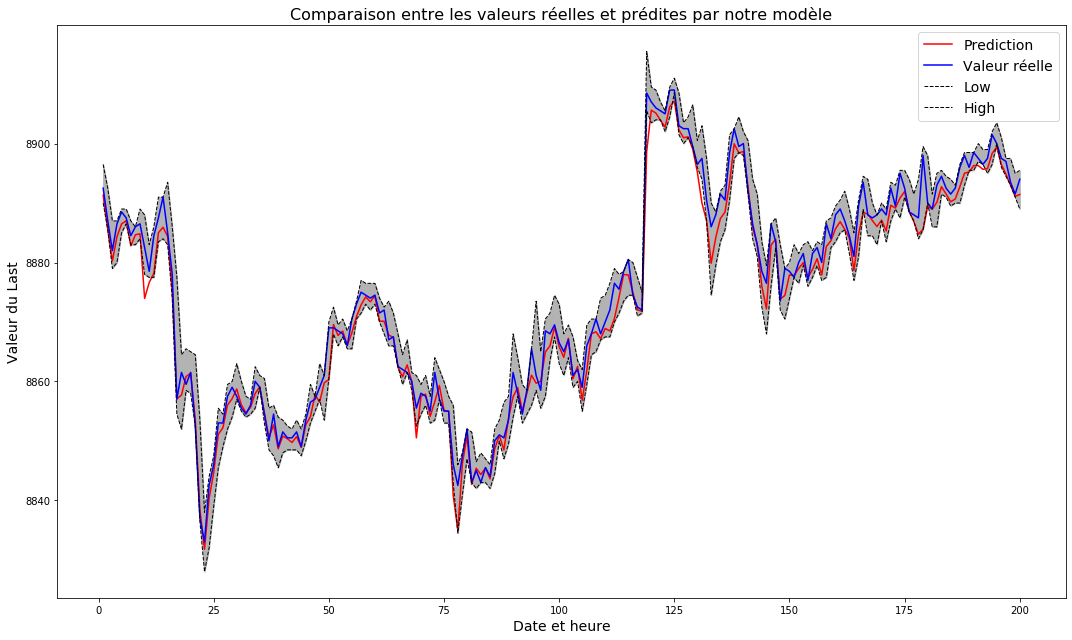

In [54]:
tracer_prediction_no_date(200,prediction,reel,low,high)

In [55]:
#Calcul de la RMSE
rmse = sqrt(mean_squared_error(prediction, reel))
rmse = rmse/len(reel)
rmse

0.005472617089344384

In [56]:
def classification (inv_yhat, dataframe, time_lag):
    df_2013_testing_set = dataframe.iloc[limit+time_lag:,:]
    Last_hat=[]
    Last_hat = inv_yhat
    df_2013_testing_set.insert(9,'Last_hat',Last_hat)
    Y_hat=[]
    n_test = df_2013_testing_set.shape[0]
    for i in range (1,n_test) : 
        if df_2013_testing_set.iloc[i,9]<df_2013_testing_set.iloc[i-1,9]:
            Y_hat.append(-1)
        if df_2013_testing_set.iloc[i,9]==df_2013_testing_set.iloc[i-1,9]:
            Y_hat.append(0)
        if df_2013_testing_set.iloc[i,9]>df_2013_testing_set.iloc[i-1,9]:
            Y_hat.append(1) 
    l = len(Y_hat)
    print("La longueur de la liste des labels prédit est : %s" %l)
    print("La longueur du dataframe est : %s" %n_test)
    df_2013_testing_set = df_2013_testing_set.iloc[1:,:]
    n_test=df_2013_testing_set.shape[0]
    print()
    print("La longueur de la liste des labels est : %s" %l)
    print("La longueur du dataframe privé de sa première ligne est : %s" %n_test)
    df_2013_testing_set.insert(9,'Y_hat',Y_hat)
    return (df_2013_testing_set)

In [57]:
df_prediction = classification(prediction, df_2013, 2)
df_prediction

La longueur de la liste des labels prédit est : 6046
La longueur du dataframe est : 6047

La longueur de la liste des labels est : 6046
La longueur du dataframe privé de sa première ligne est : 6046


,date_time,Time,Open,High,Low,Last,Volume,zscore_volume,Y,Y_hat,Last_hat
24197,2013-10-17 08:20:00,1900-01-01 08:20:00,8892.5,8892.5,8885.5,8887.0,340,0.782530,-1,-1,8891.324089
24198,2013-10-17 08:25:00,1900-01-01 08:25:00,8887.0,8887.0,8879.0,8882.0,428,1.136804,-1,-1,8885.565334
24199,2013-10-17 08:30:00,1900-01-01 08:30:00,8881.5,8887.0,8880.0,8886.5,248,0.186014,1,-1,8880.264370
24200,2013-10-17 08:35:00,1900-01-01 08:35:00,8886.5,8889.0,8885.0,8888.5,201,-0.076316,1,1,8884.351371
24201,2013-10-17 08:40:00,1900-01-01 08:40:00,8888.0,8889.0,8886.5,8887.5,77,-0.717153,-1,1,8886.494262
...,...,...,...,...,...,...,...,...,...,...,...
30238,2013-12-30 17:40:00,1900-01-01 17:40:00,9651.5,9654.0,9650.5,9652.5,137,-0.584860,1,1,9554.650104
30239,2013-12-30 17:45:00,1900-01-01 17:45:00,9652.0,9659.0,9652.0,9655.5,112,-0.712437,1,1,9559.009461
30240,2013-12-30 17:50:00,1900-01-01 17:50:00,9655.5,9658.5,9654.5,9658.0,73,-0.897280,1,1,9560.835619
30241,2013-12-30 17:55:00,1900-01-01 17:55:00,9658.0,9658.5,9655.0,9658.0,67,-0.868869,0,1,9562.113563


## Erreur de classification post-régression

In [32]:
def calcul_erreur_classification (df_err):
    s = 0
    n = df_err.shape[0]
    for i in range (0,n):
        if df_err.iloc[i,8] != df_err.iloc[i,9]:
            s+=1
    erreur = s/n
    return(erreur)

In [33]:
erreur = calcul_erreur_classification(df_prediction)
erreur

0.5653324512074098

## Erreur de classification en comparant la réelle nature de la bougie à celle prédite à l'instant d'après (redressage sur la classification) 

In [58]:
def calcul_erreur_classification_bis (df_err):
    s = 0
    n = df_err.shape[0]
    for i in range (0,n-1):
        if df_err.iloc[i,8] != df_err.iloc[i+1,9]:
            s+=1
    erreur = s/(n-1)
    return(erreur)

In [59]:
erreur_modele = calcul_erreur_classification_bis(df_prediction)
erreur_modele

0.2665012406947891

## Erreur de classification en recalculant la nature de la bougie à partir de la courbe shiftée des valeurs prédites du Last

In [36]:
reel_triche = reel[0:len(reel)-1]
prediction_triche = prediction[1:]

In [37]:
def classification_triche (inv_yhat, dataframe, time_lag):
    df_2013_testing_set = dataframe.iloc[limit+time_lag:dataframe.shape[0]-1,:]
    Last_hat_triche = []
    Last_hat_triche = inv_yhat
    df_2013_testing_set.insert(9,'Last_hat_triche',Last_hat_triche)
    Y_hat_triche=[]
    n_test = df_2013_testing_set.shape[0]
    for i in range (1,n_test) : 
        if df_2013_testing_set.iloc[i,9]<df_2013_testing_set.iloc[i-1,9]:
            Y_hat_triche.append(-1)
        if df_2013_testing_set.iloc[i,9]==df_2013_testing_set.iloc[i-1,9]:
            Y_hat_triche.append(0)
        if df_2013_testing_set.iloc[i,9]>df_2013_testing_set.iloc[i-1,9]:
            Y_hat_triche.append(1) 
    l = len(Y_hat_triche)
    print("La longueur de la liste des labels prédit est : %s" %l)
    print("La longueur du dataframe est : %s" %n_test)
    df_2013_testing_set = df_2013_testing_set.iloc[1:,:]
    n_test=df_2013_testing_set.shape[0]
    print()
    print("La longueur de la liste des labels est : %s" %l)
    print("La longueur du dataframe privé de sa première ligne est : %s" %n_test)
    df_2013_testing_set.insert(9,'Y_hat_triche',Y_hat_triche)
    return (df_2013_testing_set)

In [38]:
df_prediction_triche = classification_triche(prediction_triche, df_2013, 2)
df_prediction_triche

La longueur de la liste des labels prédit est : 6045
La longueur du dataframe est : 6046

La longueur de la liste des labels est : 6045
La longueur du dataframe privé de sa première ligne est : 6045


,date_time,Time,Open,High,Low,Last,Volume,zscore_volume,Y,Y_hat_triche,Last_hat_triche
24197,2013-10-17 08:20:00,1900-01-01 08:20:00,8892.5,8892.5,8885.5,8887.0,340,0.782530,-1,-1,8885.565334
24198,2013-10-17 08:25:00,1900-01-01 08:25:00,8887.0,8887.0,8879.0,8882.0,428,1.136804,-1,-1,8880.264370
24199,2013-10-17 08:30:00,1900-01-01 08:30:00,8881.5,8887.0,8880.0,8886.5,248,0.186014,1,1,8884.351371
24200,2013-10-17 08:35:00,1900-01-01 08:35:00,8886.5,8889.0,8885.0,8888.5,201,-0.076316,1,1,8886.494262
24201,2013-10-17 08:40:00,1900-01-01 08:40:00,8888.0,8889.0,8886.5,8887.5,77,-0.717153,-1,1,8887.034636
...,...,...,...,...,...,...,...,...,...,...,...
30237,2013-12-30 17:35:00,1900-01-01 17:35:00,9647.5,9655.0,9647.0,9652.0,257,0.024667,1,1,9554.650104
30238,2013-12-30 17:40:00,1900-01-01 17:40:00,9651.5,9654.0,9650.5,9652.5,137,-0.584860,1,1,9559.009461
30239,2013-12-30 17:45:00,1900-01-01 17:45:00,9652.0,9659.0,9652.0,9655.5,112,-0.712437,1,1,9560.835619
30240,2013-12-30 17:50:00,1900-01-01 17:50:00,9655.5,9658.5,9654.5,9658.0,73,-0.897280,1,1,9562.113563


In [39]:
erreur_triche = calcul_erreur_classification(df_prediction_triche)
erreur_triche

0.2665012406947891

## Apprentissage de l'erreur

In [60]:
df_prediction_err = processed_data.iloc[limit+2:, :].copy(deep=True)
yhat = model_lstm.predict(test_X)
Last_hat_norm = []
Last_hat_norm = yhat
df_prediction_err.insert(6, 'Last_hat_norm', Last_hat_norm)
df_prediction_err['err'] = df_prediction_err['Last'] - df_prediction_err['Last_hat_norm']
index_err = np.linspace(1,6047, num=6047, dtype='int64')
df_prediction_err.index = index_err
limit_err = int(2*df_prediction_err.shape[0]/3)
df_prediction_err

,Open,High,Low,zscore_volume,Last,Y,Last_hat_norm,err
1,0.984995,0.977305,0.983009,0.080113,0.982500,-1,0.983894,-0.001394
2,0.982494,0.974468,0.979823,0.782530,0.978571,-1,0.981654,-0.003082
3,0.978564,0.970567,0.975221,1.136804,0.975000,-1,0.977539,-0.002539
4,0.974634,0.970567,0.975929,0.186014,0.978214,1,0.973751,0.004463
5,0.978207,0.971986,0.979469,-0.076316,0.979643,1,0.976671,0.002972
...,...,...,...,...,...,...,...,...
6043,1.524830,1.514539,1.521416,-0.584860,1.525357,1,1.455627,0.069730
6044,1.525188,1.518085,1.522478,-0.712437,1.527500,1,1.458742,0.068758
6045,1.527688,1.517730,1.524248,-0.897280,1.529286,1,1.460047,0.069239
6046,1.529475,1.517730,1.524602,-0.868869,1.529286,0,1.460960,0.068326


In [61]:
var_err = df_prediction_err.iloc[0:6047,7].values
var_err = var_err.reshape(-1,1)
var_err

array([[-0.00139393],
       [-0.00308208],
       [-0.00253865],
       ...,
       [ 0.06923883],
       [ 0.06832568],
       [ 0.06769914]])

In [62]:
scaled_err = np.concatenate((scaled[limit+2:,:], var_err), axis=1)
scaled_err.shape

(6047, 6)

In [63]:
time_lag = 2
data_set_lstm_err = build_dataset(scaled_err, time_lag,1)
data_set_lstm_err

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
2,0.080113,0.984995,0.977305,0.983009,0.982500,-0.001394,0.782530,0.982494,0.974468,0.979823,0.978571,-0.003082,1.136804,0.978564,0.970567,0.975221,0.975000,-0.002539
3,0.782530,0.982494,0.974468,0.979823,0.978571,-0.003082,1.136804,0.978564,0.970567,0.975221,0.975000,-0.002539,0.186014,0.974634,0.970567,0.975929,0.978214,0.004463
4,1.136804,0.978564,0.970567,0.975221,0.975000,-0.002539,0.186014,0.974634,0.970567,0.975929,0.978214,0.004463,-0.076316,0.978207,0.971986,0.979469,0.979643,0.002972
5,0.186014,0.974634,0.970567,0.975929,0.978214,0.004463,-0.076316,0.978207,0.971986,0.979469,0.979643,0.002972,-0.717153,0.979278,0.971986,0.980531,0.978929,0.000726
6,-0.076316,0.978207,0.971986,0.979469,0.979643,0.002972,-0.717153,0.979278,0.971986,0.980531,0.978929,0.000726,-0.029738,0.978564,0.970567,0.978053,0.976786,-0.001803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6042,3.247570,1.528403,1.520567,1.518938,1.522500,0.069571,0.024667,1.521972,1.515248,1.518938,1.525000,0.074593,-0.584860,1.524830,1.514539,1.521416,1.525357,0.069730
6043,0.024667,1.521972,1.515248,1.518938,1.525000,0.074593,-0.584860,1.524830,1.514539,1.521416,1.525357,0.069730,-0.712437,1.525188,1.518085,1.522478,1.527500,0.068758
6044,-0.584860,1.524830,1.514539,1.521416,1.525357,0.069730,-0.712437,1.525188,1.518085,1.522478,1.527500,0.068758,-0.897280,1.527688,1.517730,1.524248,1.529286,0.069239
6045,-0.712437,1.525188,1.518085,1.522478,1.527500,0.068758,-0.897280,1.527688,1.517730,1.524248,1.529286,0.069239,-0.868869,1.529475,1.517730,1.524602,1.529286,0.068326


In [64]:
def data_new_err (time_lag): #time_lag = parameter to design how many time steps to consider in the input data 
    ndrop=time_lag*6
    scaled_err = np.concatenate((scaled[limit+2:,:], var_err), axis=1)
    processed_data_lstm_err = build_dataset(scaled_err, time_lag, 1)
    processed_data_lstm_err.drop(columns = processed_data_lstm_err.columns[[ndrop, ndrop+1, ndrop+2, ndrop+3, ndrop+4]], inplace=True)
    
    # split into train and test sets
    values_err = processed_data_lstm_err.values  #values is a numpy representation of processed_data, which is data normalized for prediction
    train_err = values_err[:limit_err, :]
    test_err = values_err[limit_err:, :]
    
    # split into input and outputs
    X_train_lstm_err, Y_train_lstm_err = train_err[:, :-1], train_err[:, -1] #train_X takes all columns minus the last one which stands for the value of the Last
    X_test_lstm_err, Y_test_lstm_err = test_err[:, :-1], test_err[:, -1]
    
    # reshape input to be 3D [samples, timesteps, features]
    X_train_lstm_err = X_train_lstm_err.reshape((X_train_lstm_err.shape[0], 1, X_train_lstm_err.shape[1]))
    X_test_lstm_err = X_test_lstm_err.reshape((X_test_lstm_err.shape[0], 1, X_test_lstm_err.shape[1]))
    return(X_train_lstm_err, Y_train_lstm_err, X_test_lstm_err, Y_test_lstm_err)  

In [65]:
def optimal_model_2_layers_err():
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(train_X_err.shape[1], train_X_err.shape[2])))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss = 'mse', 
                 optimizer='adam', 
                 metrics=['accuracy'])
    return(model)

In [66]:
train_X_err, train_y_err, test_X_err, test_y_err = data_new_err(2)
model_lstm_err = optimal_model_2_layers_err()
model_lstm_err.fit(train_X_err, train_y_err, epochs=200, batch_size=64, validation_data=(test_X_err, test_y_err), verbose=0)

In [67]:
def prediction_erreur (test_X_err, model_err):
    # faire la prediction
    yhat_err = model_err.predict(test_X_err)
    return(yhat_err)

In [68]:
train_X_err, train_y_err, test_X_err, test_y_err = data_new_err(2)
prediction_err = prediction_erreur(test_X_err, model_lstm_err)

In [69]:
df_prediction_err_test = df_prediction_err.iloc[limit_err+2:, :].copy(deep=True)
err_hat = []
err_hat = prediction_err
df_prediction_err_test.insert(8, 'err_hat', err_hat)
df_prediction_err_test['Last_hat_corr'] = df_prediction_err_test['Last_hat_norm']+df_prediction_err_test['err_hat']
df_prediction_err_test

,Open,High,Low,zscore_volume,Last,Y,Last_hat_norm,err,err_hat,Last_hat_corr
4034,1.337621,1.327305,1.332035,-1.122535,1.335714,-1,1.307134,0.028580,0.027362,1.334496
4035,1.335834,1.328723,1.334513,-0.981790,1.339286,1,1.305718,0.033568,0.027836,1.333554
4036,1.339050,1.329433,1.334159,-1.080734,1.335357,-1,1.307532,0.027825,0.029325,1.336857
4037,1.335834,1.326241,1.331681,-0.927299,1.334286,-1,1.306341,0.027945,0.028138,1.334479
4038,1.334405,1.324113,1.323894,0.884122,1.330357,-1,1.304581,0.025776,0.027726,1.332307
...,...,...,...,...,...,...,...,...,...,...
6043,1.524830,1.514539,1.521416,-0.584860,1.525357,1,1.455627,0.069730,0.065528,1.521155
6044,1.525188,1.518085,1.522478,-0.712437,1.527500,1,1.458742,0.068758,0.066846,1.525588
6045,1.527688,1.517730,1.524248,-0.897280,1.529286,1,1.460047,0.069239,0.066663,1.526710
6046,1.529475,1.517730,1.524602,-0.868869,1.529286,0,1.460960,0.068326,0.067081,1.528041


In [152]:
def hl(df):
    high = df.iloc[limit+2+limit_err+2:,3]
    low = df.iloc[limit+2+limit_err+2:,4]
    return (high,low)

In [161]:
def tracer_prediction_err(nb_points, pred, corr, reel, high, low):  #nb_points est le nombre de points considérés
    plt.figure(figsize=(15, 9))
    x=np.linspace(1,nb_points,nb_points)
    plt.plot(x, pred[:nb_points], 'g', lw=1.5, label='Prediction sans correction')
    plt.plot(x, corr[1:nb_points+1], 'r', lw=1.5, label='Prediction avec correction')
    plt.plot(x, reel[:nb_points], 'b', lw=1.5, label='Valeur réelle')
    plt.plot(x, high[:nb_points], 'k--', lw=1, label='High')
    plt.plot(x, low[:nb_points], 'k--', lw=1, label='Low')
    plt.fill_between(x, low[:nb_points], high[:nb_points], color='0.7')
    plt.legend(fontsize=14)
    plt.title('Comparaison entre les valeurs réelles et prédites par notre modèle', fontsize=16)
    plt.xlabel('Date et heure', fontsize=14)
    plt.ylabel('Valeur du Last', fontsize=14)
    plt.tight_layout()

In [154]:
pred = df_prediction_err_test['Last_hat_norm'].values
corr = df_prediction_err_test['Last_hat_corr'].values
reel = df_prediction_err_test['Last'].values
high, low = hl(df_2013)
print(pred.shape[0])
print(corr.shape[0])
print(reel.shape[0])
print(high.shape[0])
print(low.shape[0])
print(high)
print(low)

2014
2014
2014
2014
2014
28229    9390.0
28230    9392.0
28231    9393.0
28232    9388.5
28233    9385.5
          ...  
30238    9654.0
30239    9659.0
30240    9658.5
30241    9658.5
30242    9659.5
Name: High, Length: 2014, dtype: float64
28229    9383.0
28230    9386.5
28231    9386.0
28232    9382.5
28233    9371.5
          ...  
30238    9650.5
30239    9652.0
30240    9654.5
30241    9655.0
30242    9656.5
Name: Low, Length: 2014, dtype: float64


In [155]:
pred = pred*1400 + 7517
reel = reel*1400 + 7517
corr = corr*1400 + 7517
print(pred)
print(reel)
print(corr)

[9346.988 9345.005 9347.545 ... 9561.065 9562.344 9562.221]
[9387.  9392.  9386.5 ... 9658.  9658.  9657. ]
[9385.295 9383.976 9388.6   ... 9654.395 9656.258 9656.357]


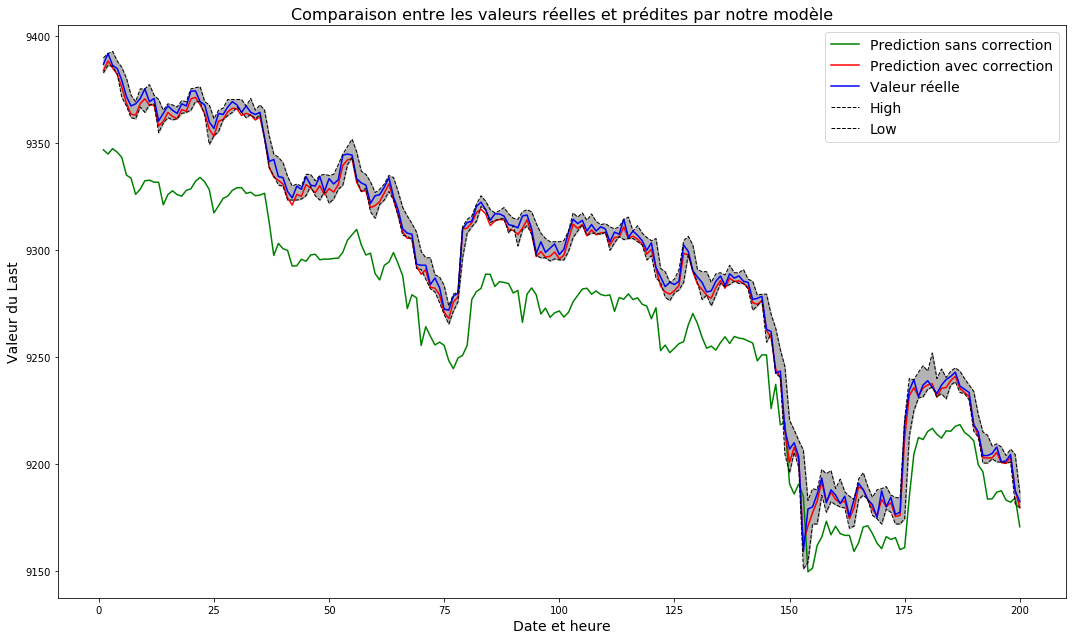

In [162]:
tracer_prediction_err(200, pred, corr, reel, high, low)

In [163]:
#Calcul de la RMSE
rmse = sqrt(mean_squared_error(corr, reel))
rmse = rmse/len(reel)
rmse

0.0033781673015914394

In [164]:
def classification_err (corr, dataframe):
    n_test = dataframe.shape[0]
    Y_hat = []
    for i in range (1,n_test) : 
        if dataframe.iloc[i,9]<dataframe.iloc[i-1,9]:
            Y_hat.append(-1)
        if dataframe.iloc[i,9]==dataframe.iloc[i-1,9]:
            Y_hat.append(0)
        if dataframe.iloc[i,9]>dataframe.iloc[i-1,9]:
            Y_hat.append(1) 
    l = len(Y_hat)
    print("La longueur de la liste des labels prédit est : %s" %l)
    print("La longueur du dataframe est : %s" %n_test)
    dataframe = dataframe.iloc[1:,:]
    n_test=dataframe.shape[0]
    print()
    print("La longueur de la liste des labels est : %s" %l)
    print("La longueur du dataframe privé de sa première ligne est : %s" %n_test)
    dataframe.insert(10,'Y_hat',Y_hat)
    return (dataframe)

In [165]:
data_classif = classification_err (corr, df_prediction_err_test)

La longueur de la liste des labels prédit est : 2013
La longueur du dataframe est : 2014

La longueur de la liste des labels est : 2013
La longueur du dataframe privé de sa première ligne est : 2013


In [166]:
data_classif

,Open,High,Low,zscore_volume,Last,Y,Last_hat_norm,err,err_hat,Last_hat_corr,Y_hat
4035,1.335834,1.328723,1.334513,-0.981790,1.339286,1,1.305718,0.033568,0.027836,1.333554,-1
4036,1.339050,1.329433,1.334159,-1.080734,1.335357,-1,1.307532,0.027825,0.029325,1.336857,1
4037,1.335834,1.326241,1.331681,-0.927299,1.334286,-1,1.306341,0.027945,0.028138,1.334479,-1
4038,1.334405,1.324113,1.323894,0.884122,1.330357,-1,1.304581,0.025776,0.027726,1.332307,-1
4039,1.330832,1.320567,1.321062,0.356013,1.325000,-1,1.298694,0.026306,0.029401,1.328095,-1
...,...,...,...,...,...,...,...,...,...,...,...
6043,1.524830,1.514539,1.521416,-0.584860,1.525357,1,1.455627,0.069730,0.065528,1.521155,1
6044,1.525188,1.518085,1.522478,-0.712437,1.527500,1,1.458742,0.068758,0.066846,1.525588,1
6045,1.527688,1.517730,1.524248,-0.897280,1.529286,1,1.460047,0.069239,0.066663,1.526710,1
6046,1.529475,1.517730,1.524602,-0.868869,1.529286,0,1.460960,0.068326,0.067081,1.528041,1


In [167]:
def calcul_erreur_classif (df_err):
    s = 0
    n = df_err.shape[0]
    for i in range (0,n):
        if df_err.iloc[i,5] != df_err.iloc[i,10]:
            s+=1
    erreur = s/n
    return(erreur)

In [168]:
erreur = calcul_erreur_classif(data_classif)
erreur

0.5752608047690015

In [169]:
def calcul_erreur_classification_corrige (df_err):
    s = 0
    n = df_err.shape[0]
    for i in range (0,n-1):
        if df_err.iloc[i,5] != df_err.iloc[i+1,10]:
            s+=1
    erreur = s/(n-1)
    return(erreur)

In [170]:
erreur_modif = calcul_erreur_classification_corrige(data_classif)
erreur_modif

0.14860834990059643

In [171]:
def calcul_erreur_classification_triche_corrige (df_err):
    s = 0
    n = df_err.shape[0]
    print("Calcul effectué sur %s données" %(n))
    nb_zero = (df_err['Y']==0).value_counts()
    print("Les données comportent %s bougies constantes" %(nb_zero[1]))
    count = n-1-nb_zero[1]
    for i in range (0,n-1):
        if df_err.iloc[i,5] != df_err.iloc[i+1,10] and df_err.iloc[i,5] != 0 :
            s+=1
    erreur = s/(count)
    pourc = (1-erreur)*100
    print("La prédiction est exacte dans %s pourcent des cas" %pourc )
    return(erreur)

In [172]:
erreur_modif_sans_zero = calcul_erreur_classification_triche_corrige(data_classif)
erreur_modif_sans_zero

Calcul effectué sur 2013 données
Les données comportent 110 bougies constantes
La prédiction est exacte dans 90.06309148264984 pourcent des cas


0.09936908517350158